In [1]:
import pandas as pd
import numpy as np
import scipy.signal as signal
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Transformign dataframe

In [2]:
def read_file(path):
    file = pd.read_csv(path)
    return file


In [3]:
df = read_file('../data/harth/S006.csv')
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175,7
408705,2019-01-12 01:09:32.890,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665,7
408706,2019-01-12 01:09:32.900,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313,7
408707,2019-01-12 01:09:32.910,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166,7


In [4]:
df['vector_mag_back'] = np.linalg.norm(df[['back_x', 'back_y', 'back_z']], axis=1)
df['vector_mag_thigh'] = np.linalg.norm(df[['thigh_x', 'thigh_y', 'thigh_z']], axis=1)
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,vector_mag_back,vector_mag_thigh
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6,0.941949,5.150574
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6,0.680364,1.004556
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6,1.197363,0.522350
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6,0.651250,1.835470
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6,0.376332,0.864297
...,...,...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175,7,0.981751,1.013901
408705,2019-01-12 01:09:32.890,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665,7,1.010286,1.035847
408706,2019-01-12 01:09:32.900,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313,7,0.982780,1.027038
408707,2019-01-12 01:09:32.910,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166,7,1.005924,1.055793


### Gravity df

In [5]:
### GRAVITY DF
# Create a copy of the original dataframe
gravity_df = df.copy()

# Define the filter parameters
order = 4  # Filter order
cutoff = 1.0  # Cutoff frequency in Hz
fs = 50  # Your actual sampling frequency

# Compute the filter coefficients
nyquist = 0.5 * fs
normal_cutoff = cutoff / nyquist
b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

# Apply the filter to the desired columns
columns_to_filter = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'vector_mag_back', 'vector_mag_thigh']
for column in columns_to_filter:
    gravity_df[column] = signal.lfilter(b, a, df[column])

gravity_df.head()


,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,vector_mag_back,vector_mag_thigh
0,2019-01-12 00:00:00.000,-0.000010,0.000004,0.000006,-0.000068,-0.000004,0.000009,6,0.000013,0.000068
1,2019-01-12 00:00:00.010,-0.000085,0.000034,0.000052,-0.000507,-0.000027,0.000077,6,0.000105,0.000539
2,2019-01-12 00:00:00.020,-0.000364,0.000147,0.000212,-0.001879,-0.000087,0.000302,6,0.000450,0.002102
3,2019-01-12 00:00:00.030,-0.001092,0.000427,0.000574,-0.004759,-0.000208,0.000784,6,0.001334,0.005607
4,2019-01-12 00:00:00.040,-0.002593,0.000961,0.001197,-0.009598,-0.000444,0.001546,6,0.003122,0.011838


In [6]:
### Orientation information

window_size = 50
columns_to_calculate = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'vector_mag_back', 'vector_mag_thigh']

# Calculate the stats for each window
label_mode = gravity_df.groupby(gravity_df.index // window_size)['label'].transform(lambda x: x.mode().iat[0])
gravity_mean = gravity_df[columns_to_calculate].rolling(window=window_size).mean().add_suffix('_mean')
gravity_median = gravity_df[columns_to_calculate].rolling(window=window_size).median().add_suffix('_median')
gravity_std = gravity_df[columns_to_calculate].rolling(window=window_size).std().add_suffix('_std')
gravity_25_p = gravity_df[columns_to_calculate].rolling(window=window_size).quantile(0.25).add_suffix('_25_p')
gravity_75_p = gravity_df[columns_to_calculate].rolling(window=window_size).quantile(0.75).add_suffix('_75_p')
gravity_min = gravity_df[columns_to_calculate].rolling(window=window_size).min().add_suffix('_min')
gravity_max = gravity_df[columns_to_calculate].rolling(window=window_size).max().add_suffix('_max')


res_gravity_df = pd.concat([label_mode, gravity_mean, gravity_median, gravity_std, gravity_25_p, gravity_75_p, gravity_min, gravity_max], axis=1)
res_gravity_df = res_gravity_df[window_size-1::window_size].reset_index(drop=True)

# Calculate the coefficient of variation
for column in columns_to_calculate:
    mean_col = column + '_mean'
    std_col = column + '_std'
    cv_col = column + '_cv'
    res_gravity_df[cv_col] = (res_gravity_df[std_col] / res_gravity_df[mean_col]) * 100

res_gravity_df

,label,back_x_mean,back_y_mean,back_z_mean,thigh_x_mean,thigh_y_mean,thigh_z_mean,vector_mag_back_mean,vector_mag_thigh_mean,back_x_median,...,vector_mag_back_max,vector_mag_thigh_max,back_x_cv,back_y_cv,back_z_cv,thigh_x_cv,thigh_y_cv,thigh_z_cv,vector_mag_back_cv,vector_mag_thigh_cv
0,6,-0.548609,0.052219,0.051613,-0.596310,-0.022863,-0.125421,0.562025,0.685854,-0.553012,...,1.105345,1.155155,-78.918755,65.915971,71.424558,-70.001690,-67.865951,-91.824071,77.743058,65.507012
1,1,-0.992104,0.066474,0.085828,-0.957654,0.046166,-0.293858,0.997371,0.997006,-0.985342,...,1.086980,1.058940,-3.271625,5.861477,2.924766,-2.543844,40.745915,-1.295528,3.201224,2.331822
2,1,-0.989961,0.070436,0.082205,-0.958006,0.055962,-0.299770,0.995850,1.004898,-0.989722,...,1.003157,1.011901,-0.331099,2.410719,4.393253,-0.253123,2.368111,-0.991398,0.331436,0.227054
3,1,-0.988463,0.071816,0.076182,-0.957165,0.063614,-0.296260,0.994076,1.004017,-0.987546,...,0.997692,1.005032,-0.205469,10.068113,4.133700,-0.161655,5.231073,-0.765442,0.178842,0.085467
4,6,-1.004707,0.070139,0.046696,-0.974926,0.098035,-0.301813,1.012034,1.039501,-0.993615,...,1.058465,1.194031,-1.721753,24.684530,41.959118,-5.765487,13.706045,-13.503265,2.130805,5.957132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,7,-0.716728,0.034958,-0.690920,0.068091,0.069092,1.001530,0.996142,1.006228,-0.716719,...,0.996353,1.006767,-0.019291,1.256903,-0.038934,0.148215,0.000464,0.035513,0.012559,0.035726
8170,7,-0.716539,0.034878,-0.690684,0.068113,0.068911,1.001317,0.995839,1.006011,-0.716548,...,0.996213,1.006891,-0.004828,1.215554,-0.050054,0.011682,0.211288,0.068998,0.021704,0.068686
8171,7,-0.716906,0.035112,-0.690435,0.067720,0.068318,1.003169,0.995941,1.007827,-0.716701,...,0.996347,1.009387,-0.054527,0.749909,-0.002426,0.915913,0.986526,0.132845,0.026728,0.127034
8172,7,-0.716665,0.034478,-0.690458,0.068067,0.068394,1.001980,0.995757,1.006717,-0.716546,...,0.996260,1.007158,-0.040716,0.456389,-0.009193,0.322304,0.838305,0.022180,0.020675,0.020286


### Movement df

In [7]:
### MOVEMENT DF
movement_df = df.copy()
movement_df.iloc[:, 1:7] -= gravity_df.iloc[:, 1:7]
# Frequency-domain features
# Apply Fourier Transform to each axis separately
for column in columns_to_calculate:
    # Get the time-domain signal values from the DataFrame
    time_domain_signal = movement_df[column].values
    # Apply Fast Fourier Transform (FFT)
    frequency_domain_signal = np.fft.fft(time_domain_signal)
    # Optionally, you can calculate the magnitude spectrum using absolute values
    magnitude_spectrum = np.abs(frequency_domain_signal)
    # Store the frequency-domain representation back into the DataFrame
    movement_df[column + '_freq'] = magnitude_spectrum
# The DataFrame 'movement_df' now contains the frequency-domain representation of each axis in separate columns

movement_df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,vector_mag_back,vector_mag_thigh,back_x_freq,back_y_freq,back_z_freq,thigh_x_freq,thigh_y_freq,thigh_z_freq,vector_mag_back_freq,vector_mag_thigh_freq
0,2019-01-12 00:00:00.000,-0.760231,0.299566,0.468564,-5.092664,-0.298640,0.709430,6,0.941949,5.150574,14.870589,0.734805,14.378314,1.703399,1.449400,20.804098,408764.957681,423828.337757
1,2019-01-12 00:00:00.010,-0.530054,0.281846,0.319935,0.901055,0.286970,0.340232,6,0.680364,1.004556,21.492233,2.557942,25.796952,14.261457,2.546137,25.919413,797.008040,11227.265793
2,2019-01-12 00:00:00.020,-1.170558,0.186206,-0.167221,-0.033563,-0.078336,-0.515515,6,1.197363,0.522350,24.783030,9.037473,50.390982,41.661096,18.247269,47.762208,800.280944,10244.812997
3,2019-01-12 00:00:00.030,-0.647680,0.016151,-0.054858,-1.549489,-0.950770,-0.221925,6,0.651250,1.835470,19.340291,9.380085,13.537304,22.017323,2.700504,44.967519,273.392790,8081.020825
4,2019-01-12 00:00:00.040,-0.352478,-0.052792,-0.114616,-0.537873,0.141347,-0.655328,6,0.376332,0.864297,35.457642,18.655457,60.838725,83.911425,16.950858,50.483087,555.300947,6546.069210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,0.026640,0.000379,-0.006505,0.160424,0.003774,-0.017253,7,0.981751,1.013901,13.645059,23.316674,22.754290,18.138877,22.966629,5.174312,140.251017,3698.680286
408705,2019-01-12 01:09:32.890,-0.028194,-0.002913,0.009261,-0.189844,-0.005473,0.024188,7,1.010286,1.035847,35.457642,18.655457,60.838725,83.911425,16.950858,50.483087,555.300947,6546.069210
408706,2019-01-12 01:09:32.900,0.032268,0.002254,-0.013270,0.235079,0.007818,-0.024212,7,0.982780,1.027038,19.340291,9.380085,13.537304,22.017323,2.700504,44.967519,273.392790,8081.020825
408707,2019-01-12 01:09:32.910,-0.034409,-0.006560,0.022609,-0.309707,-0.012489,0.023595,7,1.005924,1.055793,24.783030,9.037473,50.390982,41.661096,18.247269,47.762208,800.280944,10244.812997


In [8]:
### Movement information

window_size = 50
columns_to_calculate = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'vector_mag_back', 'vector_mag_thigh']

# Calculate the stats for each window
movement_skew = movement_df[columns_to_calculate].rolling(window=window_size).skew().add_suffix('_skew')


res_movement_df = pd.concat([movement_skew], axis=1)
res_movement_df = res_movement_df[window_size-1::window_size].reset_index(drop=True)

signal_energies = {}
for column in columns_to_calculate:
    column_values = movement_df[column].values
    windows = [column_values[i:i+window_size] for i in range(0, len(column_values), window_size)]
    energy_values = [np.sum(np.square(window)) for window in windows]
    signal_energies[column + '_se'] = energy_values
energy_df = pd.DataFrame(signal_energies)
res_movement_df = pd.concat([res_movement_df, energy_df], axis=1)


res_movement_df

,back_x_skew,back_y_skew,back_z_skew,thigh_x_skew,thigh_y_skew,thigh_z_skew,vector_mag_back_skew,vector_mag_thigh_skew,back_x_se,back_y_se,back_z_se,thigh_x_se,thigh_y_se,thigh_z_se,vector_mag_back_se,vector_mag_thigh_se
0,-0.586480,2.177623,2.416842,-3.955062,-3.370381,1.047886,-0.090458,6.232976,18.233963,0.394054,4.979302e-01,40.889432,1.592114,2.694096,49.608700,78.352033
1,1.077506,0.676690,-0.974076,1.213411,0.721216,0.106509,0.008219,-0.240362,0.056363,0.003121,7.446515e-04,0.042674,0.025606,0.005276,49.414033,50.398920
2,-0.080802,0.216121,-0.280014,0.327525,0.990841,-0.436737,0.173701,0.093825,0.003086,0.002672,3.225261e-03,0.002030,0.001402,0.002933,49.574132,50.444379
3,-1.039610,-2.477383,-1.756618,1.921617,1.513102,-0.898337,0.771648,-2.112889,0.005946,0.031270,1.727743e-02,0.007697,0.026697,0.012771,49.451645,50.154851
4,-0.791155,1.004267,0.587045,-0.087444,0.581879,0.542463,1.832320,0.745730,0.790705,1.005923,4.626068e-01,1.560169,1.791609,3.610129,54.366999,65.163484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8170,0.007295,2.662603,0.360426,-0.001275,-3.925299,2.613350,0.040003,2.666859,0.000091,0.000435,9.231476e-06,0.002100,0.000080,0.000535,49.570312,50.594764
8171,-0.569657,2.351828,-0.068629,0.059895,0.034355,0.960738,0.641791,0.851296,0.000275,0.000092,5.877541e-07,0.004366,0.006155,0.001770,49.601640,50.793208
8172,-0.068018,3.889870,-5.305275,-0.007354,-0.444646,0.609954,0.577872,0.874795,0.000435,0.000140,6.900152e-05,0.009546,0.000253,0.000547,49.580598,50.648435
8173,-0.098617,2.080444,-3.062850,-0.051279,-1.279121,0.456267,0.181704,0.957828,0.003782,0.000260,1.120913e-04,0.084623,0.000006,0.001705,49.615487,50.813529


In [9]:
# Frequency-domain features 
columns_to_calculate = ['back_x_freq', 'back_y_freq', 'back_z_freq', 'thigh_x_freq', 'thigh_y_freq', 'thigh_z_freq', 'vector_mag_back_freq', 'vector_mag_thigh_freq']
movement_freq_mean = movement_df[columns_to_calculate].rolling(window=window_size).mean().add_suffix('_mean')
movement_freq_std = movement_df[columns_to_calculate].rolling(window=window_size).std().add_suffix('_std')


res_freq_movement_df = pd.concat([movement_freq_mean, movement_freq_std], axis=1)
res_freq_movement_df = res_freq_movement_df[window_size-1::window_size].reset_index(drop=True)

res_freq_movement_df

,back_x_freq_mean,back_y_freq_mean,back_z_freq_mean,thigh_x_freq_mean,thigh_y_freq_mean,thigh_z_freq_mean,vector_mag_back_freq_mean,vector_mag_thigh_freq_mean,back_x_freq_std,back_y_freq_std,back_z_freq_std,thigh_x_freq_std,thigh_y_freq_std,thigh_z_freq_std,vector_mag_back_freq_std,vector_mag_thigh_freq_std
0,30.876841,25.345896,36.717904,52.884289,23.346864,54.548466,8368.054079,11297.298783,14.315420,12.473426,20.107501,26.835122,12.909072,25.657016,57780.494175,59568.526428
1,34.831193,31.262335,48.685742,53.658796,30.201298,59.322504,62.435361,1518.004057,19.445787,13.132707,24.598514,27.119483,13.688440,29.088432,31.403484,621.059554
2,42.454514,37.495698,55.610356,64.814241,35.285460,69.998783,77.784317,895.095157,20.228808,18.894823,28.636388,33.384873,15.470866,38.156345,45.018036,420.754175
3,47.990671,45.374528,48.605415,62.568819,42.198167,87.939283,66.469281,633.105750,19.601166,24.615750,26.662659,33.171278,18.884510,45.121239,28.859535,315.801419
4,43.692946,47.705534,56.059149,59.158507,52.421254,91.866456,35.704484,775.026199,24.897680,22.907343,24.101992,34.230390,24.139635,48.178999,19.345294,286.858810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,45.217052,50.460036,56.282366,62.650163,54.320092,96.758753,38.773221,804.039105,24.890333,22.421630,26.014044,30.269703,23.081012,46.597418,19.176643,291.807519
8170,48.151617,42.271189,52.117364,57.811284,40.599006,80.410211,56.620453,604.992226,19.675317,24.706711,25.727163,35.926654,19.442021,45.698001,30.090851,299.671646
8171,45.517174,39.482136,52.574049,69.128013,36.193555,81.112293,76.173001,918.767343,21.315732,19.885654,30.050455,34.824130,15.219705,42.140194,44.689958,374.116498
8172,35.668840,30.689580,50.779432,56.202158,30.724267,57.778643,65.762023,1303.605611,19.469653,14.002303,24.868876,26.759002,14.643626,28.431398,34.904836,707.382923


In [10]:
res_df = pd.concat([res_gravity_df, res_movement_df, res_freq_movement_df], axis=1).dropna()
res_df['label'] = res_df['label'].astype(int)
res_df

,label,back_x_mean,back_y_mean,back_z_mean,thigh_x_mean,thigh_y_mean,thigh_z_mean,vector_mag_back_mean,vector_mag_thigh_mean,back_x_median,...,vector_mag_back_freq_mean,vector_mag_thigh_freq_mean,back_x_freq_std,back_y_freq_std,back_z_freq_std,thigh_x_freq_std,thigh_y_freq_std,thigh_z_freq_std,vector_mag_back_freq_std,vector_mag_thigh_freq_std
0,6,-0.548609,0.052219,0.051613,-0.596310,-0.022863,-0.125421,0.562025,0.685854,-0.553012,...,8368.054079,11297.298783,14.315420,12.473426,20.107501,26.835122,12.909072,25.657016,57780.494175,59568.526428
1,1,-0.992104,0.066474,0.085828,-0.957654,0.046166,-0.293858,0.997371,0.997006,-0.985342,...,62.435361,1518.004057,19.445787,13.132707,24.598514,27.119483,13.688440,29.088432,31.403484,621.059554
2,1,-0.989961,0.070436,0.082205,-0.958006,0.055962,-0.299770,0.995850,1.004898,-0.989722,...,77.784317,895.095157,20.228808,18.894823,28.636388,33.384873,15.470866,38.156345,45.018036,420.754175
3,1,-0.988463,0.071816,0.076182,-0.957165,0.063614,-0.296260,0.994076,1.004017,-0.987546,...,66.469281,633.105750,19.601166,24.615750,26.662659,33.171278,18.884510,45.121239,28.859535,315.801419
4,6,-1.004707,0.070139,0.046696,-0.974926,0.098035,-0.301813,1.012034,1.039501,-0.993615,...,35.704484,775.026199,24.897680,22.907343,24.101992,34.230390,24.139635,48.178999,19.345294,286.858810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,7,-0.716728,0.034958,-0.690920,0.068091,0.069092,1.001530,0.996142,1.006228,-0.716719,...,38.773221,804.039105,24.890333,22.421630,26.014044,30.269703,23.081012,46.597418,19.176643,291.807519
8170,7,-0.716539,0.034878,-0.690684,0.068113,0.068911,1.001317,0.995839,1.006011,-0.716548,...,56.620453,604.992226,19.675317,24.706711,25.727163,35.926654,19.442021,45.698001,30.090851,299.671646
8171,7,-0.716906,0.035112,-0.690435,0.067720,0.068318,1.003169,0.995941,1.007827,-0.716701,...,76.173001,918.767343,21.315732,19.885654,30.050455,34.824130,15.219705,42.140194,44.689958,374.116498
8172,7,-0.716665,0.034478,-0.690458,0.068067,0.068394,1.001980,0.995757,1.006717,-0.716546,...,65.762023,1303.605611,19.469653,14.002303,24.868876,26.759002,14.643626,28.431398,34.904836,707.382923


## PCA

### Standard scaling

In [11]:
from sklearn.preprocessing import StandardScaler

y = res_df.iloc[:, 0].values
X = res_df.iloc[:, 1:].values

# Create an instance of the StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### Cumulative explained variance

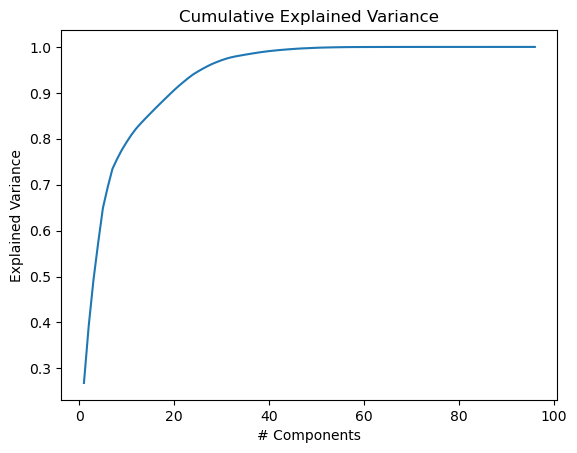

In [12]:
pca = PCA()
pca.fit(X_scaled)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, exp_var_cumul.shape[0] + 1), exp_var_cumul)
plt.xlabel('# Components')
plt.ylabel('Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [13]:
# We selected 26 components to get an explained variance greater than 95%
n_comp = 26
pca = PCA(n_components=n_comp)

X_pca = pca.fit_transform(X_scaled)

col_names = ['PC{}'.format(i+1) for i in range(n_comp)]
X_pca = pd.DataFrame(X_pca, columns=col_names)
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,24.238472,-0.474406,18.409911,53.881107,178.438129,73.922042,57.541520,29.217243,14.796010,-6.336298,...,-3.575067,-2.478644,3.185649,-1.082707,2.577892,1.852610,1.654189,-5.823213,1.524264,12.873463
1,5.525364,-2.662797,-0.695685,-0.749400,5.935899,0.582907,1.349511,2.456804,0.663462,-0.042800,...,0.262475,0.181104,-0.464920,1.204315,-0.693768,-1.306493,-1.262098,0.784361,0.515782,0.059495
2,3.859099,-3.673491,-1.888185,-1.990901,2.039089,-0.344299,2.563681,1.985866,0.703811,0.039295,...,0.052548,-0.007291,-0.286162,0.825593,0.117931,-0.107772,0.115392,0.365793,-0.134237,0.539439
3,3.647127,-3.726957,-1.972953,-2.306750,1.521176,-0.509576,2.501081,1.192217,0.393836,1.811843,...,-0.287626,0.360997,0.117091,1.359398,-0.090266,-0.726741,0.730507,0.050649,-0.163655,0.266884
4,6.869878,-1.417117,-0.729888,0.034758,2.357485,-0.996886,-0.085848,1.226461,0.911652,-0.693492,...,0.230357,0.182609,-0.255232,0.609960,-0.509984,0.006907,-0.619227,1.123681,-0.534611,0.656817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8169,-3.534323,-1.946518,1.279680,2.702851,0.837161,0.444590,0.507661,-0.564678,1.933853,-0.374531,...,0.429426,-0.914652,-0.977567,1.138108,0.780006,1.830124,-1.541732,0.065146,0.189656,0.754508
8170,-3.585678,-1.533654,1.466122,2.184558,0.682185,0.321385,0.499612,0.110318,1.404106,-2.215854,...,0.055963,-0.904831,-0.316346,-0.605474,0.537069,0.805918,-0.064336,0.080895,0.016462,0.327729
8171,-3.592687,-1.665659,1.498157,2.445492,1.150340,0.818107,0.778067,0.631430,1.001728,-1.004635,...,0.123038,-0.551594,-0.367288,0.461184,0.283585,1.036684,-0.078593,0.007639,0.338289,0.719296
8172,-3.670443,-1.598722,1.597658,2.504981,1.826058,1.380137,1.165531,0.609299,1.640715,-0.367602,...,0.331552,-1.474612,-1.344294,1.346816,1.554107,0.154201,-1.517180,-0.973413,0.177096,1.127432
